In [2]:
import pandas as pd
import numpy as np
from astropy.io import fits
import time
import math
import random
from datetime import datetime
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import os
from scipy.ndimage import gaussian_filter
from scipy.signal import convolve2d
from multiprocessing import Pool
from scipy.ndimage import convolve
import pickle
import sys
#sys.path.append('/home/quhan/csst_simu_2.0/simu_copy')
pi=math.pi
cos=math.cos
sin=math.sin
tan=math.tan
def mkdir(path):
    folder = os.path.exists(path)
    if not folder:                   #判断是否存在文件夹如果不存在则创建为文件夹
        os.makedirs(path)

In [1]:
from LVdgdetection import divide_sky,pool_sky,show_mask_,n1writedg_reg,_mask_,bkgwrite_candi,load_reg

In [4]:
# 获取当前时间

# 定义高斯卷积核的参数
size = (15, 15)  # 卷积核的大小
sigma = 2.0   # 高斯核的标准差

# 生成二维高斯卷积核矩阵
kernel = np.zeros(size)
kernel[size[0]//2, size[1]//2] = 1  # 在中心位置放置一个脉冲
kernel = gaussian_filter(kernel, sigma*1.5)

size = (60, 60) 
kernel1 = np.zeros(size)
kernel1[size[0]//2, size[1]//2] = 1  # 在中心位置放置一个脉冲
kernel1 = gaussian_filter(kernel1, sigma*3)

当前时间：2025-03-25 12:35:23.199843


In [5]:
#path00="/public/home/quhan/CSST_simu_3/dg_finder/git/"
point_id=["10109100100412"]
pathfielddata="../data/field/"

# positive sample


find dg================ 1000000 10000 100
(7, 232, 232)
starttime--------：2025-03-25 12:35:24.770727
1994 5506
band------------------------------------------------------------------------------------ ['07', 'i']

pathr: /public/home/quhan/CSST_simu_3/dg_finder/git/data/field/SCI7_10109100100412.fits


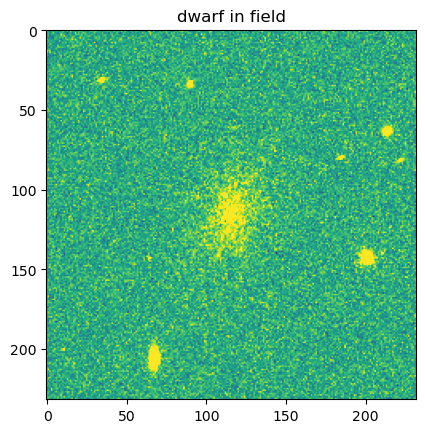

pos dg: 510 822
HBG candi dg: 5887 1274
1   ////////!!!!!!!!!!!


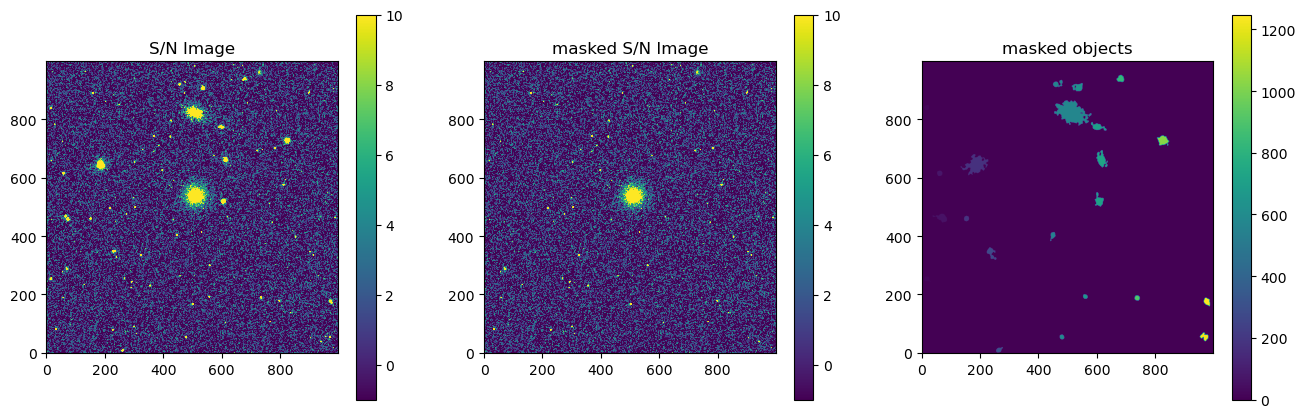

70.23448275862069 286.0298850574713 435
513.7595611285267 539.3629049111807 9570
731.2159329140461 960.6729559748428 477
813.1763285024155 576.3429951690821 414


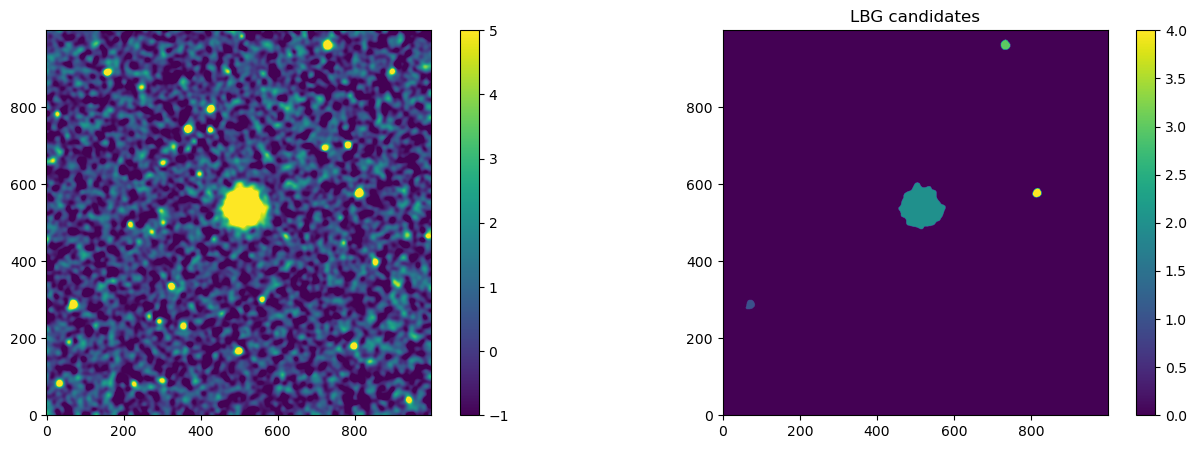

number candi:
    HBG 9
    LBG 4
HBG: True   LBG: False    dg_1000000_10000_100
band------------------------------------------------------------------------------------ ['08', 'g']

pathr: /public/home/quhan/CSST_simu_3/dg_finder/git/data/field/SCI8_10109100100412.fits


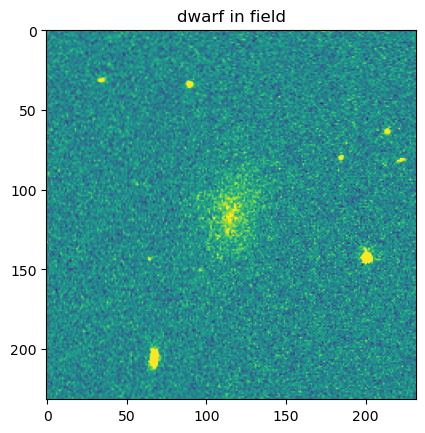

pos dg: 510 822
HBG candi dg: 5034 1018
1   ////////!!!!!!!!!!!


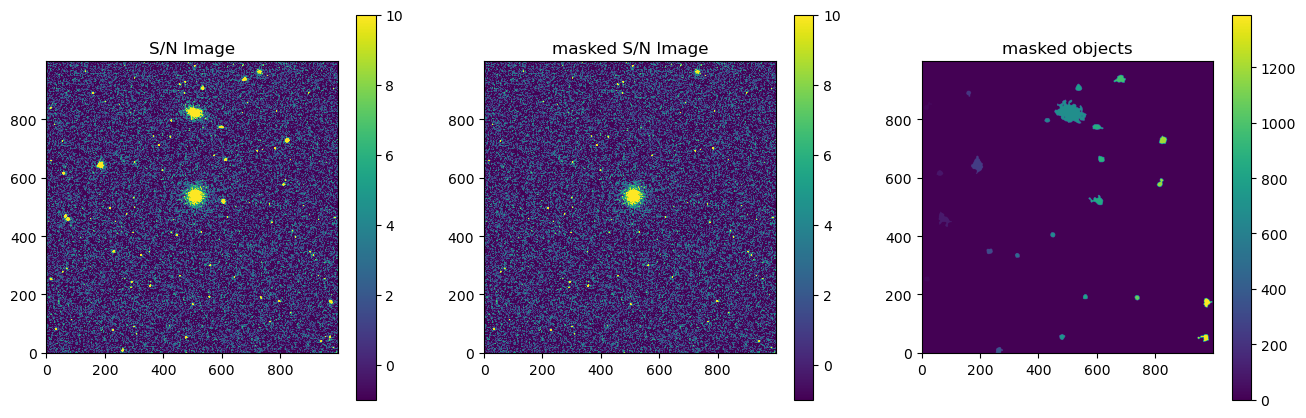

511.87236210158636 539.2645903070878 6871
730.8124098124098 960.8542568542568 693


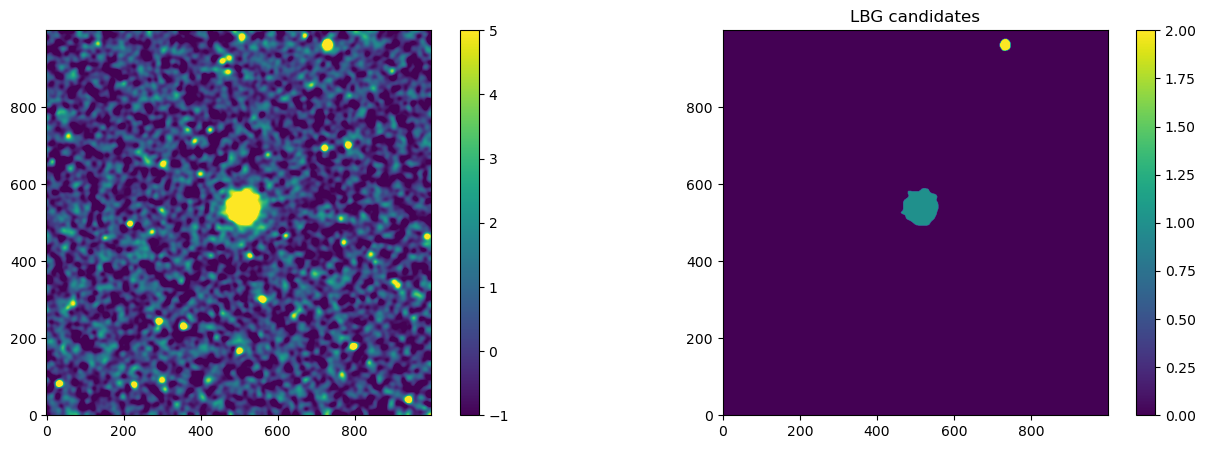

number candi:
    HBG 5
    LBG 2
HBG: True   LBG: False    dg_1000000_10000_100
band------------------------------------------------------------------------------------ ['09', 'r']

pathr: /public/home/quhan/CSST_simu_3/dg_finder/git/data/field/SCI9_10109100100412.fits


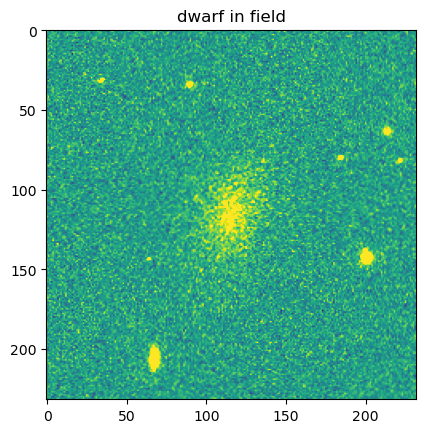

pos dg: 510 822
HBG candi dg: 6107 1390
1   ////////!!!!!!!!!!!


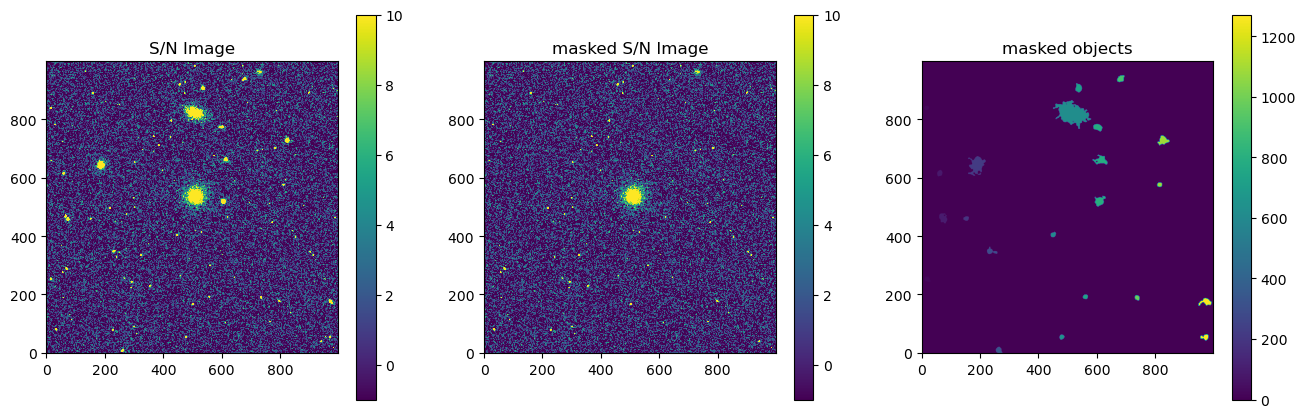

461.71153846153845 921.9153846153846 520
512.1374317588417 538.4157370045099 8426
730.3888888888889 961.05698005698 702


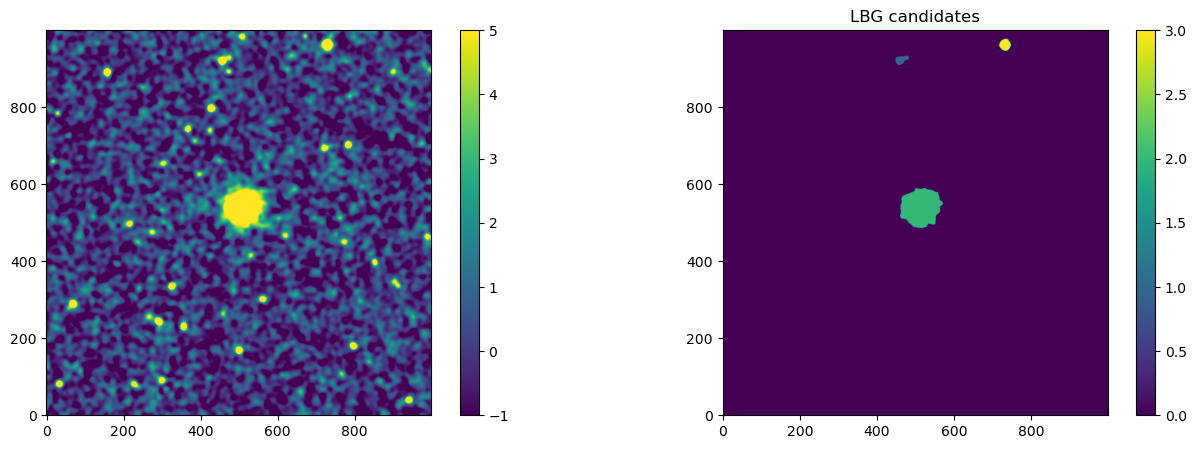

number candi:
    HBG 7
    LBG 3
HBG: True   LBG: False    dg_1000000_10000_100
aresult:
 [['07', 1000000, 10000, 100, 0, 0, array([[5622.36521148, 2112.78478002,  126.        ]])], ['08', 1000000, 10000, 100, 0, 0, array([[5622.88696861, 2108.26162098,  108.        ]])], ['09', 1000000, 10000, 100, 0, 0, array([[5619.94760111, 2114.29359751,  129.        ]])]]
cut: (3, 774, 774)
save: /public/home/quhan/CSST_simu_3/dg_finder/git/result/dwarf/1000000//colorstamp_1000000_10000_100_0


In [6]:
# dwarf galaxy sample
massi=1000000   #stellar mass: Msun
disi=10000      #distance: kpc
rhi=100         #rh: pc

band_list=[['07','i'],['08','g'],['09','r']]  #,['11','z'],['13','nuv'],['14','u'],['16','y']]
           
pathdwarf=p"../data/dwarf/"  # path of dwarf galaxy color image with no bakkground

aaresult=[]

pathdg=pathdwarf+str(massi)+"/"     
pathdgr="../result/dwarf/"+str(massi)+"/"  # path to save result
mkdir(pathdgr)
if0=0
if os.path.exists(pathdg+'dg_'+str(massi)+"_"+str(disi)+"_"+str(rhi)+'.fits'):
    print("\nfind dg================",massi,disi,rhi)
    ## load dwarf image
    dg=fits.open(pathdg+'dg_'+str(massi)+"_"+str(disi)+"_"+str(rhi)+'.fits')[0].data
    print(dg.shape)
    if len(dg[0])>0:
        if len(dg[0][0])==len(dg[0]):
            for filei in np.random.choice(range(len(point_id)),size=1,replace=False):  # choose a random field image
                aresult=[]
                now = datetime.now()
                print(f"starttime--------：{now}")
                bandi=0
                imagel=[]
                # -------- find a random place to put-in the dwarf galaxy
                ll1=max(len(dg[0]),len(dg[1]),len(dg[2]))
                ll2=max(len(dg[0][0]),len(dg[1][0]),len(dg[2][0]))
                xmin=500
                ymin=500
                xmax=9232-ll1-500
                ymax=9216-ll2-500
                x0=random.choice(np.arange(xmin,xmax,1))
                y0=random.choice(np.arange(ymin,ymax,1))
                print(x0,y0)   #chosen position to put-in the dwarf galaxy


                for bi in band_list:  # detection in i,g,r band 
                    dgi=dg[bandi]
                    chip=bi[0]
                    bandi+=1
                    print("========================================================================================")
                    print("band------------------------------------------------------------------------------------",bi)
                    print("========================================================================================")

                    file_name=pathfielddata+"SCI"+str(int(float(bi[0])))+"_"+point_id[filei]+".fits"   # path of field image
                    data=fits.open(file_name)[0].data
                    print("\npathr:",file_name)

                    data[x0:x0+len(dgi)][:,y0:y0+len(dgi[0])]+=dgi
                    plt.title("dwarf in field")
                    plt.imshow(data[x0:x0+len(dgi)][:,y0:y0+len(dgi[0])],vmax=50)
                    plt.show()
                    plt.close()
                    mask=[]
                    datar=np.array(data).astype("float32")
                    imagel.append(datar)

                    xcen=int((x0+x0+len(dgi))/2)
                    ycen=int((y0+y0+len(dgi))/2)
                    #print("center",xcen,ycen,x0,x0+len(dgi),":",y0,y0+len(dgi[0]))
                    patch_size=1000
                    over=200
                    patch_sky=divide_sky(data,patch_size,over)
                    patch_sky=np.array(patch_sky)
                    ddx=np.abs((patch_sky[:,0]+patch_sky[:,1])/2-xcen)
                    ddy=np.abs((patch_sky[:,2]+patch_sky[:,3])/2-ycen)
                    con=np.where((ddx==np.min(ddx))&(ddy==np.min(ddy)))
                    #print(con,patch_sky[con])
                    pos_skypatch=patch_sky[con]

                    x00=xcen-patch_sky[con][0][0]
                    y00=ycen-patch_sky[con][0][2]
                    print("pos dg:",x00,y00)

                    candi=[]
                    skyi=patch_sky[con][0]
                    thre_01,thre_02,thre_03,thre_area1,thre_area2,thre_area3,thre_over1,thre_over2=1.5,10,4,60,600,400,0.2,0.8

                    list_candi1,list_candi2,locals()['datar'+str(if0)],show_sn_map00,show_sn_map0,show_sn_map1,show_sn_map2,show_sn_map3,map_check=show_mask_(if0,data,skyi,kernel,kernel1,thre_01,thre_02,thre_03,thre_area1,thre_area2,thre_area3,thre_over1,thre_over2,x00,y00)
                    candi.append([list_candi1,list_candi2])
                    candi=np.array(candi,dtype=object)
                        # 获取当前时间
                    now = datetime.now()

                    # candidates
                    HBG=n1writedg_reg(list_candi1)
                    LBG=n1writedg_reg(list_candi2)
                    #print("--------------------------result/n")
                    print("number candi:")
                    print("    HBG",len(HBG))
                    print("    LBG",len(LBG))
                    LBG=np.array(LBG)
                    HBG=np.array(HBG)

                    if len(LBG)>0:
                        ddx=np.abs(LBG[:,0]-ycen)
                        ddy=np.abs(LBG[:,1]-xcen)
                        #ddr=LBG[:,2]
                        ddr=15*2
                        con=np.where((ddx<(ddr/2))&(ddy<(ddr/2)))
                        if len(con[0])>0:
                            find_LBG=True
                            aresult.append([chip,massi,disi,rhi,filei,1,LBG[con[0]]])
                        else:
                            find_LBG=False
                    else:
                        find_LBG=False

                    if len(HBG)>0:
                        ddx=np.abs(HBG[:,0]-ycen)
                        ddy=np.abs(HBG[:,1]-xcen)
                        #ddr=HBG[:,2]
                        ddr=15*2
                        con=np.where((ddx<(ddr/2))&(ddy<(ddr/2)))
                        if len(con[0])>0:
                            find_HBG=True
                            aresult.append([chip,massi,disi,rhi,filei,0,HBG[con[0]]])
                        else:
                            find_HBG=False
                    else:
                        find_HBG=False
                    print("HBG:",find_HBG,"  LBG:",find_LBG,'   dg_'+str(massi)+"_"+str(disi)+"_"+str(rhi))

                #aresult=np.array(aresult)
                print("aresult:\n",aresult)

                if len(aresult)>2:
                    candi=np.array([aresult[0][6][0],aresult[1][6][0],aresult[2][6][0]])
                    xcendg=int(np.mean(candi[:,0]))
                    ycendg=int(np.mean(candi[:,1]))
                    shapedg=int(1.6*2*np.mean(candi[:,2]))
                    color_dg=[]
                    for bbi in range(3):
                        #print("cut:",shapedg,ycendg-shapedg,ycendg+shapedg,":",xcendg-shapedg,xcendg+shapedg)
                        dgii=imagel[bbi][:,xcendg-shapedg:xcendg+shapedg][ycendg-shapedg:ycendg+shapedg]
                        color_dg.append(dgii)
                    color_dg=np.array(color_dg)
                    print("cut:",color_dg.shape)
                    np.save(pathdgr+"/"+'colorstamp_'+str(massi)+"_"+str(disi)+"_"+str(rhi)+'_'+str(filei),color_dg)  ## the cut image of dwarf galaxy
                    print("save:",pathdgr+"/"+'colorstamp_'+str(massi)+"_"+str(disi)+"_"+str(rhi)+'_'+str(filei))
                aresult.append([filei,x0,y0])
                with open(pathdgr+"/"+'dg_'+str(massi)+"_"+str(disi)+"_"+str(rhi)+'_'+str(filei)+".pickle", "wb") as file:
                    pickle.dump(aresult, file)


# negative sample 

In [101]:
n_threads=100  #!! 进程数
paths="sky0"
band_list=[['07','i'],['08','g'],['09','r']]

pathr0="../result/"+paths+"/"
mkdir(pathr0) 

for filei in range(len(point_id)):
    bandi=0
    for bi in band_list:
        bandi+=1
        print("========================================================================================")
        now = datetime.now()
        print(f"starttime--------：{now}",filei,point_id[filei])
        print("band------------------------------------------------------------------------------------",bi)
        print("========================================================================================")
        mkdir(pathr0+bi[0]+"/")    
        pathr=pathr0+bi[0]+"/"+point_id[filei]+"/"

        print("\npathresult:",pathr)
        mkdir(pathr)
        file_name="SCI"+str(int(float(bi[0])))+"_"+point_id[filei]+".fits"
        data=fits.open(pathfielddata+file_name)[0].data
        
        mask=[]
        datar=np.array(data).astype("float32")

        patch_size=1000
        over=100
        patch_sky=divide_sky(data,patch_size,over)
        #print("------------------------------------------------------------------------------------------------------------")
        list_p=pool_sky(n_threads,patch_sky)
        mkdir(pathr+"dg/")

        def f(if0):
            nskyi=0
            candi=[]
            locals()['ddatar'+str(if0)]=np.array(data)
            for skyi in patch_sky[list_p[if0][0]:list_p[if0][1]]:
                thre_01,thre_02,thre_03,thre_area1,thre_area2,thre_area3,thre_over1,thre_over2=1.5,10,4,60,600,400,0.2,0.8
                list_candi1,list_candi2,locals()['datar'+str(if0)]=_mask_(if0,data,skyi,kernel,kernel1,thre_01,thre_02,thre_03,thre_area1,thre_area2,thre_area3,thre_over1,thre_over2)
                locals()['ddatar'+str(if0)][skyi[0]:skyi[1],skyi[2]:skyi[3]]=locals()['datar'+str(if0)][skyi[0]:skyi[1],skyi[2]:skyi[3]]
                candi.append([list_candi1,list_candi2])
            candi=np.array(candi,dtype=object)
            # 获取当前时间
            now = datetime.now()
            np.save(pathr+str(bi[0])+"_candi_list"+str(if0),candi)
            grey=fits.PrimaryHDU(locals()['ddatar'+str(if0)])
            greyHDU=fits.HDUList([grey])
            greyHDU.writeto(pathr+'dg/'+str(bi[0])+'_'+str(if0)+'.fits',overwrite=True)
        vec=np.arange(0,n_threads,1)
        with Pool(processes=n_threads) as pool:
            pool.map(f, vec)

        data=fits.open(pathfielddata+file_name)[0].data
        datar=np.array(data)
        for if0 in range(nn_threads):
            data0=fits.open(pathr+'dg/'+str(bi[0])+'_'+str(if0)+'.fits')[0].data
            for skyi in patch_sky[list_p[if0][0]:list_p[if0][1]]:
                datar[skyi[0]:skyi[1],skyi[2]:skyi[3]]=data0[skyi[0]:skyi[1],skyi[2]:skyi[3]]
            os.system("rm -r "+pathr+'dg/'+str(bi[0])+'_'+str(if0)+'.fits')
        grey=fits.PrimaryHDU(datar)
        greyHDU=fits.HDUList([grey])
        greyHDU.writeto(pathr+'dg/'+str(bi[0])+'_result.fits',overwrite=True)
    
        scamp_candi=n1write_reg(data,nn_threads,pathr,bi[0])

        now = datetime.now()
        #print(f"当前时间：{now}")

        with open(pathr+"reg/LGB_candi"+str(bi[0])+".reg",'r')as f:
            data=f.readlines()
        LBG=[]
        for di in data[3:len(data)]:
            a=di.split(")")[0]
            b=a.split("(")[1].split(",")
            LBG.append([float(b[0]),float(b[1]),float(b[2])])
        LBG=np.array(LBG)
        
        with open(pathr+"reg/HGB_candi"+str(bi[0])+".reg",'r')as f:
            data=f.readlines()
        HBG=[]
        for di in data[3:len(data)]:
            a=di.split(")")[0]
            b=a.split("(")[1].split(",")
            HBG.append([float(b[0]),float(b[1]),float(b[2])])
        HBG=np.array(HBG)
    
        now = datetime.now()
        print(f"endtime--------：{now}")
        print("---------------------------------------------------------end")
        
        
            

starttime--------：2025-03-24 13:44:49.416234 0 10109100100412
band------------------------------------------------------------------------------------ ['07', 'i']

pathr: /public/home/quhan/CSST_simu_3/dg_finder/git/result/sky0/07/10109100100412/
n_subsky: 100
------------------------------------------------------------------------------------------------------------
start-write_reg--------当前时间：2025-03-24 13:45:14.859180
fcandi 19
fcandi 8
done-write_reg--------当前时间：2025-03-24 13:45:15.045455
当前时间：2025-03-24 13:45:15.045498
endtime--------：2025-03-24 13:45:15.045717
---------------------------------------------------------end
starttime--------：2025-03-24 13:45:15.045742 0 10109100100412
band------------------------------------------------------------------------------------ ['08', 'g']

pathr: /public/home/quhan/CSST_simu_3/dg_finder/git/result/sky0/08/10109100100412/
n_subsky: 100
---------------------------------------------------------------------------------------------------------

In [159]:
## cross match candidates
for filei in range(len(point_id)):
    pointi=point_id[filei]
    now = datetime.now()
    print(f"starttime----------------------------------------------------------------：{now}","  file_id:",filei)
    for LH in ['LBG','HBG']:
        print('-------')
        result=[]
        for band in band_list[0:3]:
            #print("=======================")
            path0=pathr0+band[0]+"/"+pointi+"/"  
            if LH=="LBG":
                LH0="LGB"
            if LH=="HBG":
                LH0="HGB"
            file=path0+"reg/"+LH0+"_candi"+str(band[0])+".reg"
            if os.path.exists(file):
                BG0=load_reg(file)
                result.append([BG0])
            else:
                result.append([[0]])
        dd=15
        print("candis",LH,len(result[0][nnn]),len(result[1][nnn]),len(result[2][nnn]))
        for nnn in range(1):
            if len(result[0][nnn])>1 and len(result[1][nnn])>1 and len(result[2][nnn])>1:
                nni=0
                candi0=result[0][nnn]
                across=[]
                
                for dg in candi0:
                    ra0=dg[0]
                    dec0=dg[1]
                    cross=0
                    crossl=[]
                    crossl.append([nni,dg[2]])
                    nni+=1
                    for i in range(2):
                        candi=result[i+1][nnn]
                        con=np.where((abs(candi[:,0]-ra0)<dd)&(abs(candi[:,1]-dec0)<dd))
                        if len(con[0])>0:
                            cross+=1
                            crossl.append([con[0][0],candi[:,2][con[0][0]]])
                    if cross==2:
                        #print(np.array(crossl).shape)
                        #print(len(candi0),len(candi),cross)
                        across.append([crossl[0][0],crossl[1][0],crossl[2][0],int(np.mean(np.array([crossl[0][1],crossl[1][1],crossl[2][1]])))])

                #print("cross candis:",len(across))
                if len(across)>0:
                    candi=[]
                    bandii=0
                    crosscandi=[]
                    candi0=result[bandii][nnn]
                    for dgi in range(len(across)):
                        crosscandi.append([candi0[across[dgi][bandii]][0],candi0[across[dgi][bandii]][1],across[dgi][3]])

                        

                for band in band_list[0:3]:
                    path0=pathr0+band[0]+"/"+str(pointi)+"/"
                    mkdir(path0+"dg/")
                    file_name='SCI'+str(int(float(band[0])))+'_'+str(pointi)+'.fits'
                    orig_data=fits.open(pathfielddata+file_name)[0].data

                    filename=path0+"dg/"+LH+"_scampcandi"+band[0]+".pickle"
                    namereg="cross_"+LH
                    #print(filename)
                    #print(path0,namereg)
                    scamp_candi=bkgwrite_candi(orig_data,crosscandi,namereg,path0,band)
                    with open(filename, "wb") as file:
                        pickle.dump(scamp_candi, file)

                ncandi=[]
                for band in band_list[0:3]:
                    path0=pathr0+band[0]+"/"+pointi+"/"  #+"field_"+str(int(float(band[0])))+"_1/"+"/"
                    file=path0+"dg/"+LH+"_scampcandi"+band[0]+".pickle"
                    if os.path.exists(file):
                        with open(file,'rb') as file:
                            data=pickle.load(file)
                            ncandi.append(data)
                if len(ncandi)==3:
                    mapp0=[]
                    for crossi in range(len(data)):
                        dg7=ncandi[0][crossi]
                        dg8=ncandi[1][crossi]
                        dg9=ncandi[2][crossi]
                        mapp=np.array([dg7,dg8,dg9])
                        mapp0.append(mapp)
                    print("combine numcandi",LH,": ",len(mapp0))
                    ccc+=len(mapp0)
                    with open(pathrr+LH+"_gri_"+pointi+".pickle", "wb") as file:
                        pickle.dump(mapp0, file)

starttime----------------------------------------------------------------：2025-03-24 14:40:49.370786   file_id: 0
-------
candis LBG 8 9 9
numcandi LBG :  2
-------
candis HBG 19 12 16
numcandi HBG :  9


In [161]:
# combine candidates of all pointings ----- negative sample

import cv2
# rescale size of img
new_size = (448,448)  

pathresult=pathr0+"/combine_candis/"

result=[]
for LH in ['LBG','HBG']:
    aresult=[]
    orig_aresult=[]
    for filei in range(len(point_id)):
        pointi=point_id[filei]
        file=pathrr+LH+"_gri_"+pointi+".pickle"
        if os.path.exists(file):
            with open(file,'rb') as file:
                data=pickle.load(file)
            for crossi in range(len(data)):
                dg7=data[crossi][0]
                dg8=data[crossi][1]
                dg9=data[crossi][2]
                if len(dg7)==len(dg7[0]) and len(dg8)==len(dg8[0]) and len(dg9)==len(dg9[0]):
                    orig_aresult.append([dg7,dg8,dg9])
                    dg7 = cv2.resize(dg7, new_size, interpolation=cv2.INTER_LINEAR)
                    dg8 = cv2.resize(dg8, new_size, interpolation=cv2.INTER_LINEAR)
                    dg9 = cv2.resize(dg9, new_size, interpolation=cv2.INTER_LINEAR)
                    aresult.append([dg7,dg8,dg9])
                #print(dg7.shape,dg8.shape,dg9.shape)
    aresult=np.array(aresult)
    orig_aresult=np.array(orig_aresult)
    print(pointi,LH,"num candis:",aresult.shape)
    np.save(pathresult+"orig_completecandi_"+LH,orig_aresult)   # orig image
    np.save(pathresult+"completecandi_"+LH,aresult)             # reshaped image

10109100100412 LBG num candis: (2, 3, 448, 448)
10109100100412 HBG num candis: (9, 3, 448, 448)


/tmp/ipykernel_2647166/658831261.py:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  orig_aresult=np.array(orig_aresult)
